In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
col = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

In [4]:
df.columns = col
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


### There is no null data 
### EDA 

In [6]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [7]:
from statistics import mean

In [8]:
age = [[30,39],[40,49],[60,69],[50,59],[70,79],[20,29]]
mean_age = []
for i in range(len(age)):
    mean_age.append(mean(age[i]))

In [9]:
mean_age

[34.5, 44.5, 64.5, 54.5, 74.5, 24.5]

In [10]:
df['age'].replace(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'],mean_age,inplace=True)

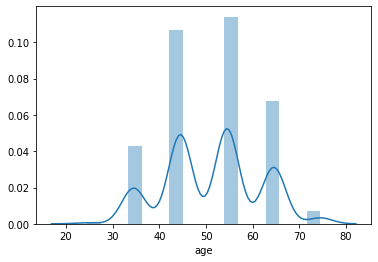

In [11]:
sns.distplot(df['age'])

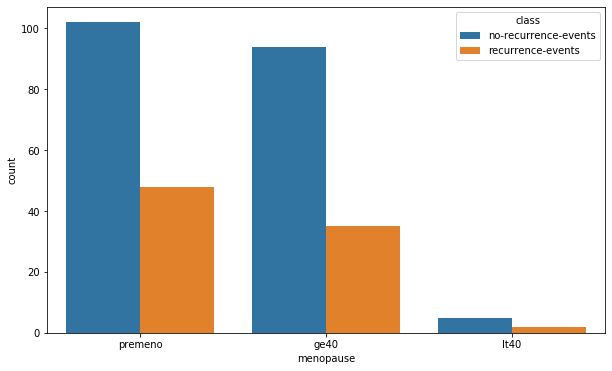

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(x='menopause',data=df,hue='class')

There are more data of premeno 

(array([60., 50., 30.,  8., 54.,  8., 28., 22., 19.,  7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

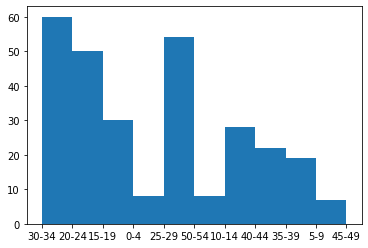

In [13]:
plt.hist(df['tumor-size'])

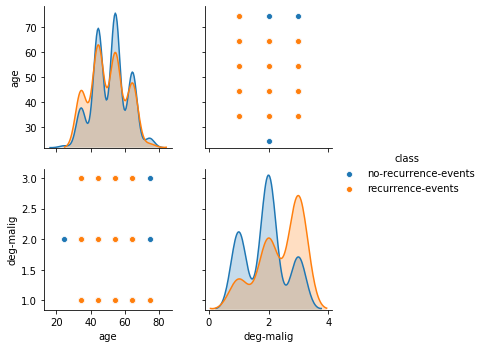

In [14]:
sns.pairplot(df, hue ='class')

### Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,34.5,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,44.5,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,44.5,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,64.5,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,44.5,premeno,0-4,0-2,no,2,right,right_low,no


In [17]:
df['class']=le.fit_transform(df['class'])
df['menopause']=le.fit_transform(df['menopause'])
df['node-caps']=le.fit_transform(df['node-caps'])
df['breast']=le.fit_transform(df['breast'])
df['breast-quad']=le.fit_transform(df['breast-quad'])
df['irradiat']=le.fit_transform(df['irradiat'])

In [18]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,2,30-34,0-2,1,3,0,2,0
1,0,44.5,2,20-24,0-2,1,2,1,5,0
2,0,44.5,2,20-24,0-2,1,2,0,2,0
3,0,64.5,0,15-19,0-2,1,2,1,3,0
4,0,44.5,2,0-4,0-2,1,2,1,4,0


In [19]:
df['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [20]:
df['inv-nodes'].value_counts()

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

In [21]:
tumor = [[30,34], [20,24], [15,19], [0,4], [25,29], [50,54], [10,14],
       [40,44], [35,39], [5,9], [45,49]]
mean_tumor = []
for i in range(len(tumor)):
    mean_tumor.append(mean(tumor[i]))

In [22]:
df['tumor-size'].replace(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'],mean_tumor,inplace=True)

In [23]:
nodes = [[0,2], [6,8], [9,11], [3,5], [15,17], [12,14], [24,26]]
mean_node = []
for i in range(len(nodes)):
    mean_node.append(mean(nodes[i]))

df['inv-nodes'].replace(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],mean_node,inplace=True)

In [24]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,2,32,1,1,3,0,2,0
1,0,44.5,2,22,1,1,2,1,5,0
2,0,44.5,2,22,1,1,2,0,2,0
3,0,64.5,0,17,1,1,2,1,3,0
4,0,44.5,2,2,1,1,2,1,4,0


### Train test split

In [25]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [26]:
x.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,34.5,2,32,1,1,3,0,2,0
1,44.5,2,22,1,1,2,1,5,0
2,44.5,2,22,1,1,2,0,2,0
3,64.5,0,17,1,1,2,1,3,0
4,44.5,2,2,1,1,2,1,4,0


In [27]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


### Model building

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=55)

In [31]:
n = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
accu = []

In [32]:
for i in n:
    model = KNeighborsClassifier(n_neighbors=i) #hyper parameter
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accu.append(accuracy_score(y_test,pred))
    # print accuracy with neighbours
    print(i,'------',accuracy_score(y_test,pred))

1 ------ 0.5565217391304348
2 ------ 0.6521739130434783
3 ------ 0.591304347826087
4 ------ 0.6434782608695652
5 ------ 0.6608695652173913
6 ------ 0.6695652173913044
7 ------ 0.6782608695652174
8 ------ 0.6608695652173913
9 ------ 0.6782608695652174
10 ------ 0.6782608695652174
11 ------ 0.6695652173913044
12 ------ 0.6869565217391305
13 ------ 0.6869565217391305
14 ------ 0.6521739130434783
15 ------ 0.6521739130434783
16 ------ 0.6782608695652174


In [33]:
dist = ['euclidean','manhattan','hamming']
accu1=[]
for i in dist:
    model = KNeighborsClassifier(metric=i) #hyper parameter
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accu1.append(accuracy_score(y_test,pred))
    # print accuracy with metrics
    print(i,'------',accuracy_score(y_test,pred))

euclidean ------ 0.6608695652173913
manhattan ------ 0.6521739130434783
hamming ------ 0.6956521739130435


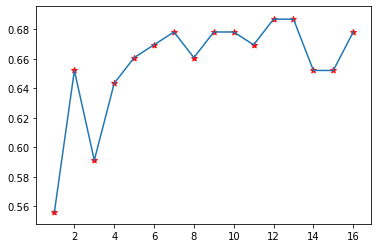

In [34]:
plt.plot(n,accu)
plt.scatter(n,accu,marker='*',c='r')
plt.show()

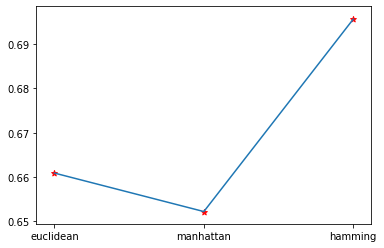

In [35]:
plt.plot(dist,accu1)
plt.scatter(dist,accu1,marker='*',c='r')
plt.show()